## Ankur Srivastava 19A3HP672

## Q1 Logistics regression

In [1]:
#importing libraries

import pandas as pd 
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
#loading dataset
SA_df = pd.read_csv(r"https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data" )

In [3]:
# Top five rows
SA_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# dataset info
SA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [6]:
# rows 0 to 4 columns 2 to 7
SA_df.iloc[0:5,1:7]

,sbp,tobacco,ldl,adiposity,famhist,typea
0,160,12.00,5.73,23.11,Present,49
1,144,0.01,4.41,28.61,Absent,55
2,118,0.08,3.48,32.28,Present,52
3,170,7.50,6.41,38.03,Present,51
4,134,13.60,3.50,27.78,Present,60


In [7]:
# column 8 to last
SA_df.iloc[0:5,7:]

,obesity,alcohol,age,chd
0,25.30,97.20,52,1
1,28.87,2.06,63,1
2,29.14,3.81,46,0
3,31.99,24.26,58,1
4,25.99,57.34,49,1


In [8]:
# target variable count
SA_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

In [9]:
# making features variables
X_features = list( SA_df.columns ) 
X_features.remove( 'row.names')
X_features.remove( 'chd' )
X_features

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age']

## Encoding Categorical Features

In [10]:
# creating dummy variables for x_features
encoded_SA_df = pd.get_dummies( SA_df[X_features], drop_first = True )

In [11]:
# printing first 5 rows
encoded_SA_df[encoded_SA_df.columns].head(5)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Present
0,160,12.00,5.73,23.11,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,55,28.87,2.06,63,0
2,118,0.08,3.48,32.28,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,60,25.99,57.34,49,1


In [12]:
# adding constant
import statsmodels.api as sm
Y = SA_df.chd 
X = sm.add_constant( encoded_SA_df )

## Splitting into Train and Validation Sets

In [13]:

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size = 0.3,  random_state = 42)

In [14]:
# fitting the model
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train) 
logit_model = logit.fit()


Optimization terminated successfully.
         Current function value: 0.515459
         Iterations 6


## Printing Model Summary

In [15]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.199     
Dependent Variable: chd              AIC:              352.9863  
Date:               2020-09-21 13:40 BIC:              390.7628  
No. Observations:   323              Log-Likelihood:   -166.49   
Df Model:           9                LL-Null:          -207.83   
Df Residuals:       313              LLR p-value:      4.7595e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.5732   1.5863 -4.1437 0.0000 -9.6823 -3.4640
sbp                0.0097   0.0068  1.4272 0.1535 -0.0036  0.0230
tobacco            0.0619   0.0319  1.9390 0.0525 -0.0007  0.1245
ldl                0.2067   0.0717  2.8837 0.0039  0.0662  0.3472
adiposity          0.0262   0.0347  0.7554 0.4500 -0.0418  0.0942
typea              0.0387   0.0149  2.5972 0.0094  0.0095  0.0679
obesity           -0.0646   0.0510 -1.2661 0.2055 -0.1645  0.0354
alcohol            0.0011   0.0063  0.1777 0.8590 -0.0113  0.0135
age                0.0415   0.0143  2.9071 0.0036  0.0135  0.0696
famhist_Present    0.7519   0.2731  2.7533 0.0059  0.2167  1.2872
=================================================================

"""

## Model Diagnostics

In [16]:
def get_significant_vars( lm ):    
    var_p_vals_df = pd.DataFrame( lm.pvalues )    
    var_p_vals_df['vars'] = var_p_vals_df.index    
    var_p_vals_df.columns = ['pvals', 'vars'] 
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [17]:
# printing significant variables from fit model
significant_vars = get_significant_vars( logit_model )
significant_vars

['const', 'ldl', 'typea', 'age', 'famhist_Present']

In [18]:
# building final model
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.528087
         Iterations 6


In [19]:
# printing final model summary
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.179     
Dependent Variable: chd              AIC:              351.1443  
Date:               2020-09-21 13:42 BIC:              370.0326  
No. Observations:   323              Log-Likelihood:   -170.57   
Df Model:           4                LL-Null:          -207.83   
Df Residuals:       318              LLR p-value:      2.5286e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -6.6526   1.1139 -5.9723 0.0000 -8.8358 -4.4694
ldl                0.2028   0.0648  3.1320 0.0017  0.0759  0.3298
typea              0.0372   0.0145  2.5625 0.0104  0.0088  0.0657
age                0.0592   0.0111  5.3278 0.0000  0.0374  0.0809
famhist_Present    0.7004   0.2666  2.6275 0.0086  0.1779  1.2228
=================================================================

"""

## Predicting on Test Data

In [20]:
y_pred_df = pd.DataFrame( { "actual": y_test, "predicted_prob": final_logit.predict(  sm.add_constant( X_test[significant_vars] ) ) } )


In [21]:
y_pred_df.sample(10, random_state = 42)
#when cut-off probability is not considered wrt success class

,actual,predicted_prob
29,1,0.657565
357,0,0.465959
447,0,0.067349
5,0,0.582238
209,0,0.598367
76,0,0.406939
75,0,0.180435
296,0,0.094291
428,0,0.247063
227,1,0.223939


In [22]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.5 else 0) 
y_pred_df.sample(10, random_state = 42) 

#when cut-off probability is 0.5 and above, we see there is only one variable falling in the success class

,actual,predicted_prob,predicted
29,1,0.657565,1
357,0,0.465959,0
447,0,0.067349,0
5,0,0.582238,1
209,0,0.598367,1
76,0,0.406939,0
75,0,0.180435,0
296,0,0.094291,0
428,0,0.247063,0
227,1,0.223939,0


## Creating a Confusion Matrix

In [24]:
# importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
from sklearn import metrics


In [25]:
def draw_cm( actual,predicted):
## Cret   
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )    
    sn.heatmap(cm, annot=True,  fmt='.2f',  
    xticklabels = ["Response", "coronary heart disease"] , 
    yticklabels = ["Response", "coronary heart disease"] )    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')    
    plt.show()


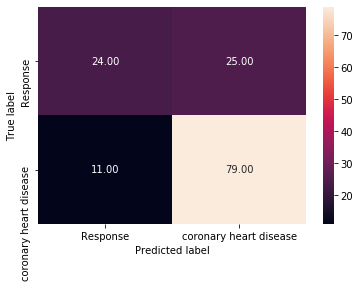

In [27]:
# a simple confusion matrix
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted )

## Measuring accuracies

In [28]:
# printing accuracies
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        90
           1       0.69      0.49      0.57        49

    accuracy                           0.74       139
   macro avg       0.72      0.68      0.69       139
weighted avg       0.73      0.74      0.73       139



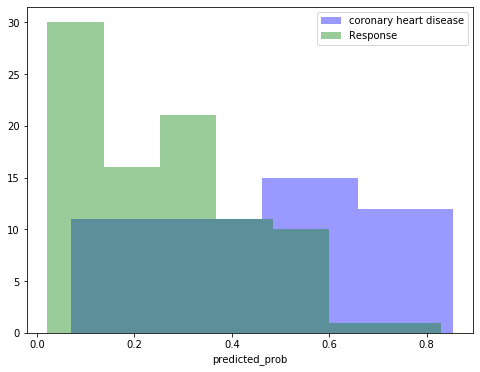

In [29]:
# drawing a density plot for actual and predicted probabilities
plt.figure( figsize = (8,6) ) 
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], 
            kde=False, color = 'b', 
            label = 'coronary heart disease' ) 
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], 
            kde=False, color = 'g', 
            label = 'Response' ) 
plt.legend() 
plt.show()


## ROC & AUC curve

In [30]:
def draw_roc( actual, probs ):
    fpr,     tpr,     thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds
# defining a function for actual and predicted probabilities

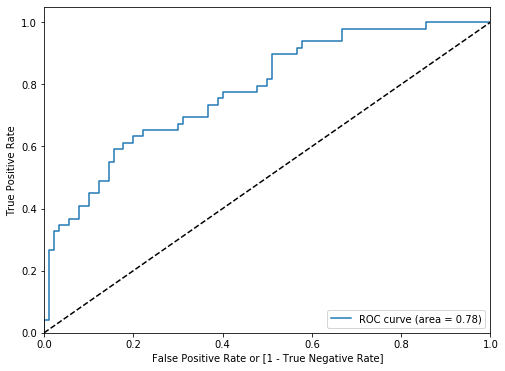

In [31]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

In [32]:
# printing the accuracy score rounded to two decimal places
auc_score = metrics.roc_auc_score( y_pred_df.actual, 
                                  y_pred_df.predicted_prob  ) 
round( float( auc_score ), 2 )

0.78

## Finding Optimal Cutoff

## Youden's index

In [33]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 
                         'fpr': fpr,  
                         'thresholds': thresholds } ) 
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr 
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]


,tpr,fpr,thresholds,diff
43,0.591837,0.155556,0.434413,0.436281
46,0.612245,0.177778,0.421181,0.434467
49,0.632653,0.200000,0.414076,0.432653
52,0.653061,0.222222,0.405464,0.430839
44,0.591837,0.166667,0.430871,0.425170


In [34]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(
    lambda x: 1 if x > 0.22 else 0)


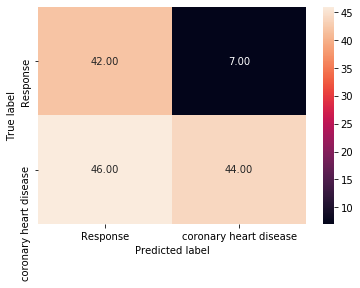

In [35]:
# building a confusion matrix based on Youden's Index
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_new)

In [36]:
# printing the classification report
print(metrics.classification_report( y_pred_df.actual,
                                    y_pred_df.predicted_new ))

              precision    recall  f1-score   support

           0       0.86      0.49      0.62        90
           1       0.48      0.86      0.61        49

    accuracy                           0.62       139
   macro avg       0.67      0.67      0.62       139
weighted avg       0.73      0.62      0.62       139



In [37]:
# precision for CHD=1 is 0.48 and recall is 0.86

## Cost Based Approach

In [38]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):   
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )   
    cm_mat = np.array( cm ) 
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

In [39]:
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

In [40]:
idx = 0 
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):    
    cost = get_total_cost( y_pred_df.actual, y_pred_df.predicted_prob.map(  lambda x: 1 if x > (each_prob/100)  else 0), 1, 5 )    
    cost_df.loc[idx] = [(each_prob/100), cost]    
    idx += 1

In [41]:
cost_df.sort_values( 'cost', ascending = True )[0:5]


,prob,cost
3,0.13,66.0
2,0.12,68.0
7,0.17,69.0
8,0.18,69.0
1,0.11,70.0


In [42]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map( 
    lambda x: 1 if x > 0.13 else 0)

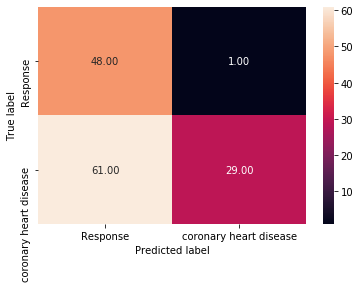

In [43]:
draw_cm( y_pred_df.actual, 
        y_pred_df.predicted_using_cost )

In [44]:
# printing the classification report
print(metrics.classification_report( y_pred_df.actual, 
        y_pred_df.predicted_using_cost ))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48        90
           1       0.44      0.98      0.61        49

    accuracy                           0.55       139
   macro avg       0.70      0.65      0.55       139
weighted avg       0.78      0.55      0.53       139



In [45]:
# precision is 0.44 and recall is 0.98 for CHD=1